In [1]:
library(dplyr)
library(tidyr)
library(ggsci)
library(lfe)
library(stringr)
library(ggplot2)
library(doMC)
registerDoMC(6)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loading required package: foreach

Loading required package: iterators

Loading required package: parallel



In [2]:
df <- data.table::fread('/pool001/mfzhao/PROCESSED_DATA/dyadic_mvmt_2020.csv')

In [4]:
df %>% 
    filter(origin_cluster != destination_cluster) %>%
    mutate(oRain  = as.numeric(oPRCP > 0),
           dRain  = as.numeric(dPRCP > 0),
           nearby = as.numeric(dist < 100)) -> df

In [3]:
df

date,dyad,origin_cluster,destination_cluster,n,bordering,ndotd,pdotd,dist,oPRCP,⋯,dp3,op1:dp1,op1:dp2,op1:dp3,op2:dp1,op2:dp2,op2:dp3,op3:dp1,op3:dp2,op3:dp3
<date>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2020-01-01,01001->01003,1,1,55601,0,35,0.0063624795,225.19072,0,⋯,0,0,0,0,0,0,0,0,0,0
2020-01-01,01001->01015,1,1,55601,0,11,0.0019996364,156.86416,0,⋯,0,0,0,0,0,0,0,0,0,0
2020-01-01,01001->01021,1,1,55601,1,189,0.0343573896,35.25908,0,⋯,0,0,0,0,0,0,0,0,0,0
2020-01-01,01001->01041,1,1,55601,0,12,0.0021814216,94.91486,0,⋯,0,0,0,0,0,0,0,0,0,0
2020-01-01,01001->01045,1,1,55601,0,7,0.0012724959,156.90896,0,⋯,0,0,0,0,0,0,0,0,0,0
2020-01-01,01001->01047,1,1,55601,1,103,0.0187238684,49.64206,0,⋯,0,0,0,0,0,0,0,0,0,0
2020-01-01,01001->01051,1,1,55601,1,1460,0.2654062898,47.29939,0,⋯,0,0,0,0,0,0,0,0,0,0
2020-01-01,01001->01069,1,1,55601,0,18,0.0032721323,199.56546,0,⋯,0,0,0,0,0,0,0,0,0,0
2020-01-01,01001->01073,1,1,55601,0,102,0.0185420833,115.20405,0,⋯,0,0,0,0,0,0,0,0,0,0


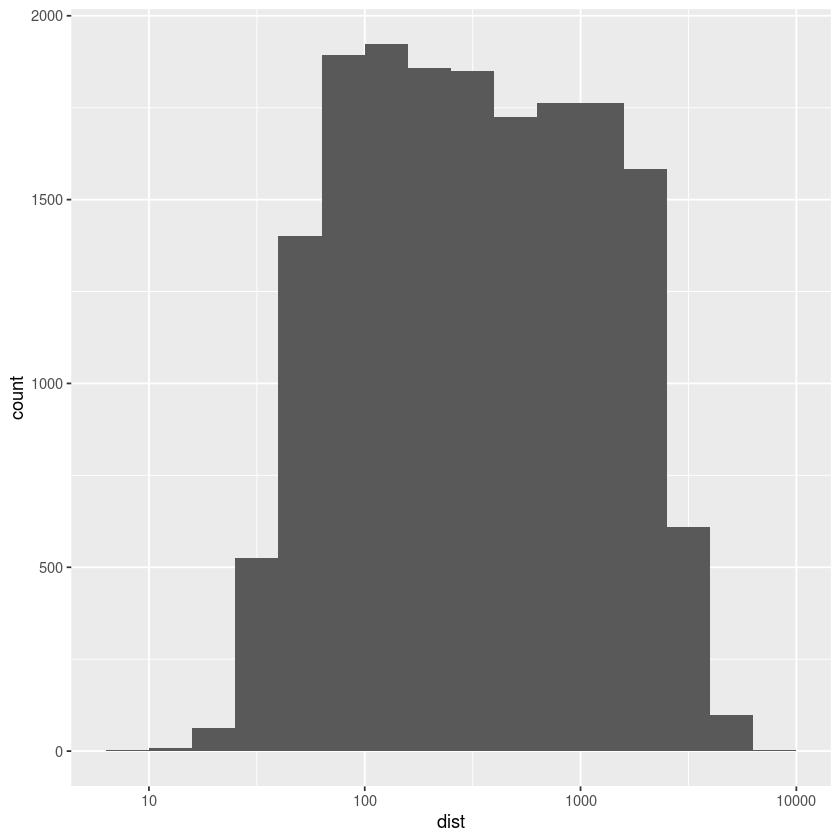

In [5]:
df %>%
    select(dyad, dist) %>%
    distinct()%>%
    ggplot(aes(x = dist)) +
    geom_histogram(binwidth = 0.2, center = 0.1) +
    scale_x_log10()

In [6]:
df %>%
    select(-matches('op[123]:dp[123]')) %>%
    mutate(op1 = ifelse(op2 == 1 | op3 == 1, 0, op1),
           op2 = ifelse(op3 == 1, 0, op2)) -> df.op_mex

df %>%
    select(-matches('op[123]:dp[123]')) %>%
    mutate(dp1 = ifelse(dp2 == 1 | dp3 == 1, 0, dp1),
           dp2 = ifelse(dp3 == 1, 0, dp2)) -> df.dp_mex

df %>% filter(nearby == 1) -> dfc
df %>% filter(nearby == 0) -> dfnc

In [26]:
dfc

date,dyad,origin_cluster,destination_cluster,n,bordering,ndotd,pdotd,dist,oPRCP,⋯,op1:dp3,op2:dp1,op2:dp2,op2:dp3,op3:dp1,op3:dp2,op3:dp3,oRain,dRain,nearby
<date>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
2020-01-01,01003->12033,1,12,218022,1,998,0.0480709022,34.00226,0,⋯,0,0,0,0,0,0,0,0,0,1
2020-01-01,01003->12113,1,12,218022,0,107,0.0051538943,66.94946,0,⋯,0,0,0,0,0,0,0,0,0,1
2020-01-01,01003->28039,1,28,218022,0,11,0.0005298396,89.45491,0,⋯,0,0,0,0,0,0,0,0,0,1
2020-01-01,01003->28059,1,28,218022,0,51,0.0024565291,90.60068,0,⋯,0,0,0,0,0,0,0,0,0,1
2020-01-01,01005->13215,1,13,24881,0,20,0.0120481928,86.09850,0,⋯,0,0,0,0,0,0,0,0,0,1
2020-01-01,01015->13045,1,13,114277,0,42,0.0040268456,72.27829,0,⋯,0,0,0,0,0,0,0,0,0,1
2020-01-01,01015->13097,1,13,114277,0,43,0.0041227229,98.00010,0,⋯,0,0,0,0,0,0,0,0,0,1
2020-01-01,01015->13115,1,13,114277,0,24,0.0023010547,78.38508,0,⋯,0,0,0,0,0,0,0,0,0,1
2020-01-01,01015->13143,1,13,114277,0,30,0.0028763183,56.95421,0,⋯,0,0,0,0,0,0,0,0,0,1


In [38]:
get_coefs <- function(dv, type) {
    if(type == 'all') {
        temp <- df
    } else {
        temp <- df %>%
            filter(nearby == ifelse(type == 'nearby', 1, 0))
    }
    
    if(dv == 'ndotd') {
        fit <- felm(log(ndotd) ~ op1 + op2 + op3 + dp1 + dp2 + dp3
             | dyad + date | 0 | origin_cluster + destination_cluster, temp)
    } else {
        fit <- felm(log(pdotd) ~ op1 + op2 + op3 + dp1 + dp2 + dp3
             | dyad + date | 0 | origin_cluster + destination_cluster, temp, weights = temp$n)
    }
    
    out <- as.data.frame(summary(fit)$coef) %>%
        mutate(var  = rownames(.),
               dv   = dv, 
               type = type) %>%
        rename(estimate = Estimate, se = `Cluster s.e.`)
    
    return(out)
}

get_coefs('pdotd', 'all')

estimate,se,t value,Pr(>|t|),var,dv,type
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
0.001782912,0.03422717,0.05209056,0.9586640957,op1,pdotd,all
0.080870574,0.02927682,2.76227301,0.0080095749,op2,pdotd,all
0.001106196,0.05549237,0.01993420,0.9841752047,op3,pdotd,all
0.001879748,0.03021970,0.06220275,0.9506493686,dp1,pdotd,all
-0.188840211,0.04509372,-4.18772752,0.0001141548,dp2,pdotd,all
0.117707384,0.04016654,2.93048388,0.0050896261,dp3,pdotd,all


In [49]:
foreach(dv = c('ndotd', 'pdotd'), .combine = rbind) %:%
    foreach(type = c('all', 'nearby', 'distant'), .combine = rbind) %dopar%
    get_coefs(dv, type) -> dyad_coefs

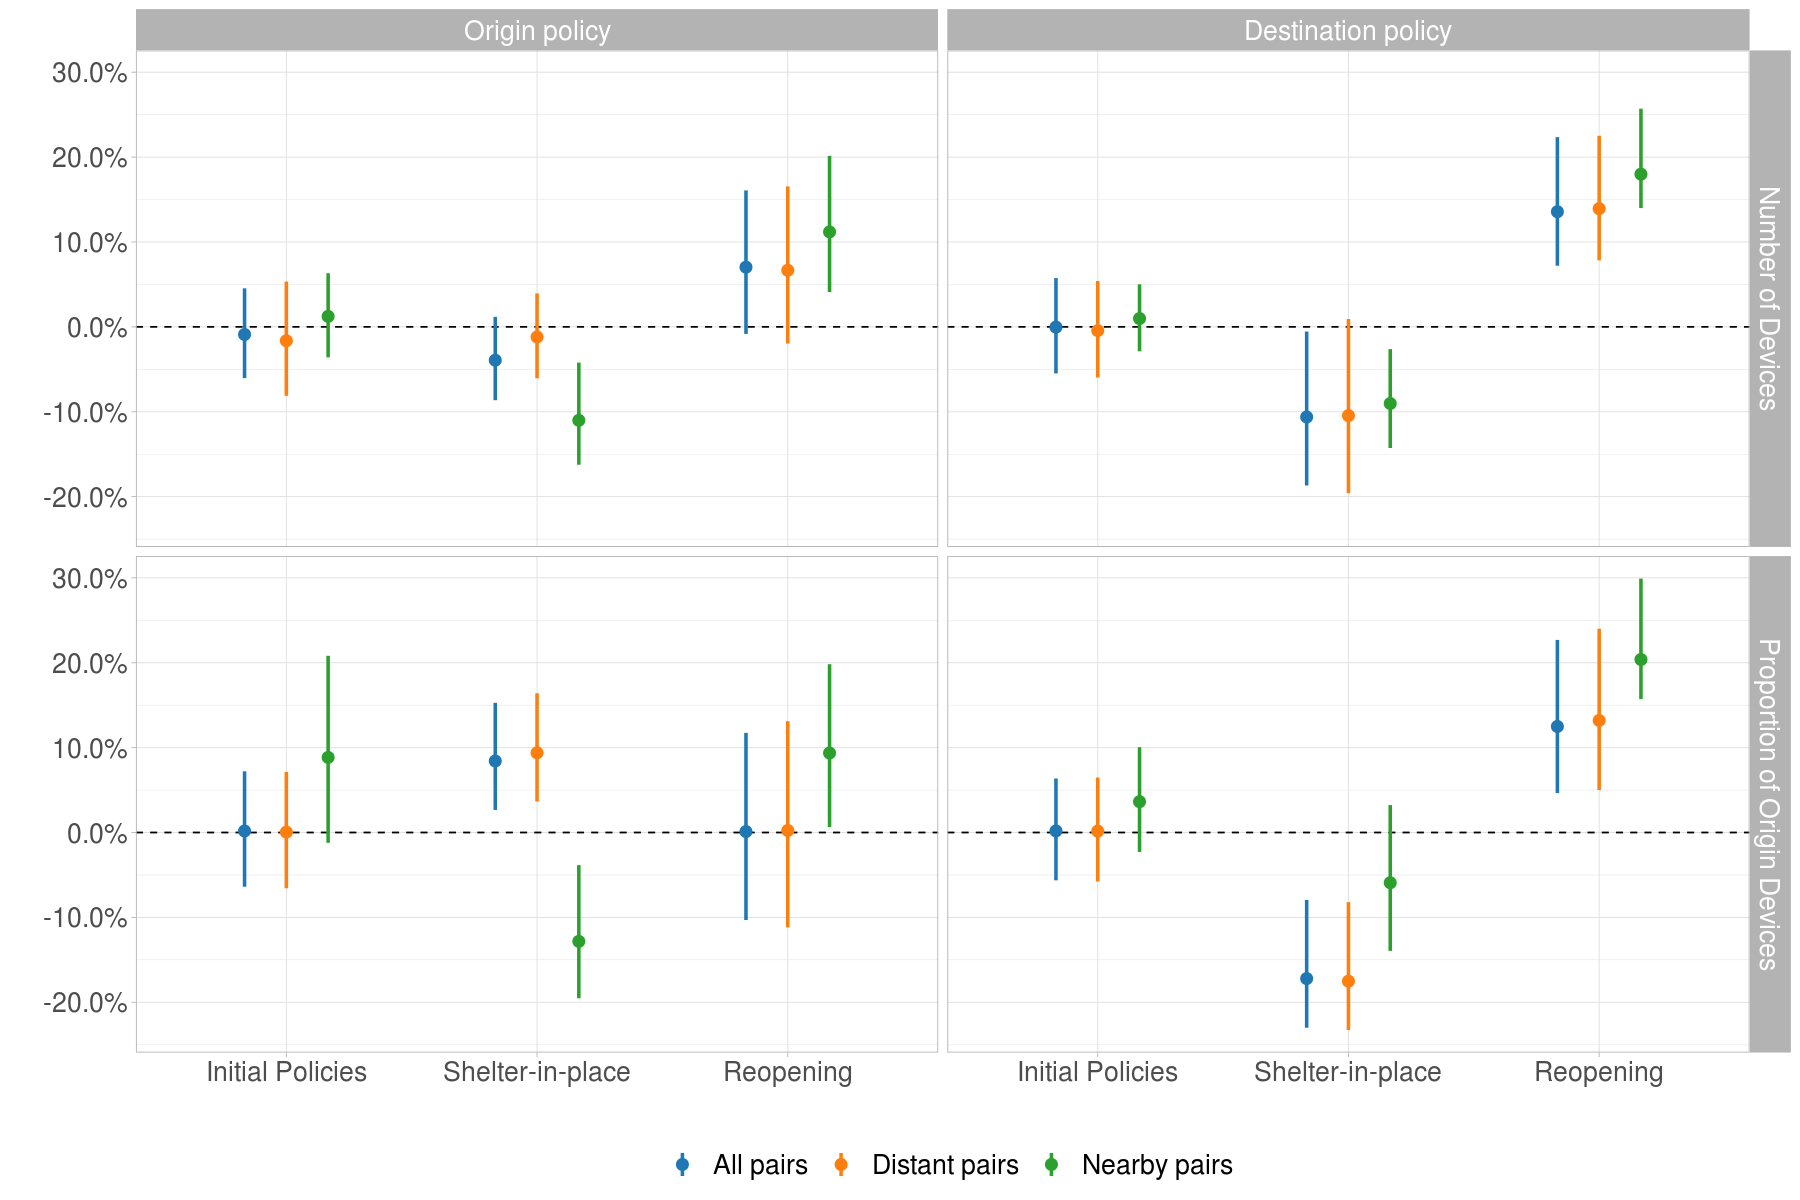

In [50]:
options(repr.plot.width=15, repr.plot.height=10)
dyad_coefs %>%
    mutate(od = ifelse(str_detect(var, 'op'), 'Origin policy', 'Destination policy'),
           od = factor(od, c('Origin policy', 'Destination policy')),
           var = ifelse(str_detect(var, 'p1'), 'Initial Policies', 
                        ifelse(str_detect(var, 'p2'), 'Shelter-in-place', 'Reopening')),
           var = factor(var, levels = c('Initial Policies', 'Shelter-in-place', 'Reopening')),
           dv  = ifelse(dv == 'ndotd', 'Number of Devices', 'Proportion of Origin Devices'),
           estimate = exp(estimate) - 1,
           u95ci   = exp(estimate + 1.98 * se) - 1,
           l95ci    = exp(estimate - 1.98 * se) - 1) %>%
    ggplot(aes(x = var, y = estimate, color = type)) + 
    geom_hline(aes(yintercept = 0), linetype = 2) +
    geom_point(position = position_dodge(0.5), size = 3) +
    geom_linerange(aes(ymin = l95ci, ymax = u95ci), 
                   position = position_dodge(0.5), size = 1) +
    xlab('') + 
    ylab('') +
    labs(color = '') + 
    scale_color_d3(labels = c('All pairs', 'Distant pairs', 'Nearby pairs')) + 
    scale_y_continuous(labels = scales::percent) +
    facet_grid(dv ~ od, scales = 'free_x') +
    theme_light() +
    theme(text = element_text(size=20),
          legend.position = 'bottom') -> p
p
ggsave('/home/mfzhao/p3.pdf', p, device = 'pdf', width = 6.5, height = 5, scale = 2)

In [45]:
df.op_mex %>%
    mutate(o   = ifelse(op3 == 1, 'p3', 
                     ifelse(op2 == 1, 'p2', 
                        ifelse(op1 == 1, 'p1', 'p0'))),
           dp0 = 1) -> df.op_mex

df.op_mex %>%
    select(date, dyad, origin_cluster, destination_cluster, n, nearby, bordering, dist, 
           ndotd, pdotd, oRain, dRain, oTMAX, dTMAX) %>%
    bind_cols(as.data.frame(model.matrix(ndotd ~ 0 + o * (dp0 + dp1 + dp2 + dp3), df.op_mex))) -> df.opex

df.opex %>%
    mutate(`op0:dp0` = op0 * dp0,
           `op0:dp1` = op0 * dp1,
           `op0:dp2` = op0 * dp2,
           `op0:dp3` = op0 * dp3) -> df.opex

colnames(df.opex) <- str_replace(colnames(df.opex), ':', '_')

In [46]:
get_coefs2 <- function(dv, type) {
    if(type == 'all') {
        temp <- df.opex
    } else {
        temp <- df.opex %>%
            filter(nearby == ifelse(type == 'nearby', 1, 0))
    }
    
    if(dv == 'ndotd') {
        fit <- felm(log(ndotd) ~ 
                          op1 + op2 + op3 +
                          op0_dp1 + op0_dp2 + op0_dp3 +
                          op1_dp1 + op1_dp2 + op1_dp3 +
                          op2_dp1 + op2_dp2 + op2_dp3 +
                          op3_dp1 + op3_dp2 + op3_dp3 
             | dyad + date | 0 | origin_cluster + destination_cluster, temp)
    } else {
        fit <- felm(log(pdotd) ~ 
                          op1 + op2 + op3 +
                          op0_dp1 + op0_dp2 + op0_dp3 +
                          op1_dp1 + op1_dp2 + op1_dp3 +
                          op2_dp1 + op2_dp2 + op2_dp3 +
                          op3_dp1 + op3_dp2 + op3_dp3 
             | dyad + date | 0 | origin_cluster + destination_cluster, temp, weights = temp$n)
    }
    
    out <- as.data.frame(summary(fit)$coef) %>%
        mutate(var  = rownames(.),
               dv   = dv, 
               type = type) %>%
        rename(estimate = Estimate, se = `Cluster s.e.`)
    
    return(out)
}

get_coefs2('pdotd', 'all')

Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in newols(mm, nostats = nostats[1], exactDOF = exactDOF, onlyse = onlyse, :
“Negative eigenvalues set to zero in multiway clustered variance matrix. See felm(...,psdef=FALSE)”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”


estimate,se,t value,Pr(>|t|),var,dv,type
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
0.05790488,0.04205311,1.3769466,1.746628e-01,op1,pdotd,all
0.24912555,0.06749177,3.6911989,5.518774e-04,op2,pdotd,all
NaN,0.00000000,NaN,NaN,op3,pdotd,all
0.05480508,0.02978592,1.8399659,7.171295e-02,op0_dp1,pdotd,all
-0.20220554,0.03053514,-6.6220595,2.342306e-08,op0_dp2,pdotd,all
NaN,0.00000000,NaN,NaN,op0_dp3,pdotd,all
-0.05124097,0.03213748,-1.5944305,1.171421e-01,op1_dp1,pdotd,all
-0.05514457,0.04538822,-1.2149533,2.300903e-01,op1_dp2,pdotd,all
0.03801035,0.08424931,0.4511651,6.538213e-01,op1_dp3,pdotd,all


In [52]:
foreach(dv = c('ndotd', 'pdotd'), .combine = rbind) %:%
    foreach(type = c('all', 'nearby', 'distant'), .combine = rbind) %dopar%
    get_coefs2(dv, type) -> dyad_coefs2

In [51]:
df %>%
    mutate(o = ifelse(op3 == 1, 'op3', 
                     ifelse(op2 == 1, 'op2',
                           ifelse(op1 == 1, 'op1', 'op0'))),
           d = ifelse(dp3 == 1, 'dp3', 
                     ifelse(dp2 == 1, 'dp2',
                           ifelse(dp1 == 1, 'dp1', 'dp0')))) %>%
    group_by(o, d, nearby) %>%
    tally() -> ics

ics %>%
    ungroup() %>%
    rename(type = nearby) %>%
    mutate(type = ifelse(type, 'nearby', 'distant')) %>%
    bind_rows(df %>%
              mutate(o = ifelse(op3 == 1, 'op3', 
                     ifelse(op2 == 1, 'op2',
                           ifelse(op1 == 1, 'op1', 'op0'))),
                     d = ifelse(dp3 == 1, 'dp3', 
                     ifelse(dp2 == 1, 'dp2',
                           ifelse(dp1 == 1, 'dp1', 'dp0'))),
                    type = 'all') %>%
              group_by(o, d, type) %>%
              tally()) %>%
    rename(`origin policy` = o, `destination policy` = d) -> ics

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 18 rows [1, 2, 3, 16, 17, 18, 31, 32, 33, 46, 47, 48, 61, 62, 63, 76, 77, 78].”
Joining, by = c("origin policy", "destination policy", "type")

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



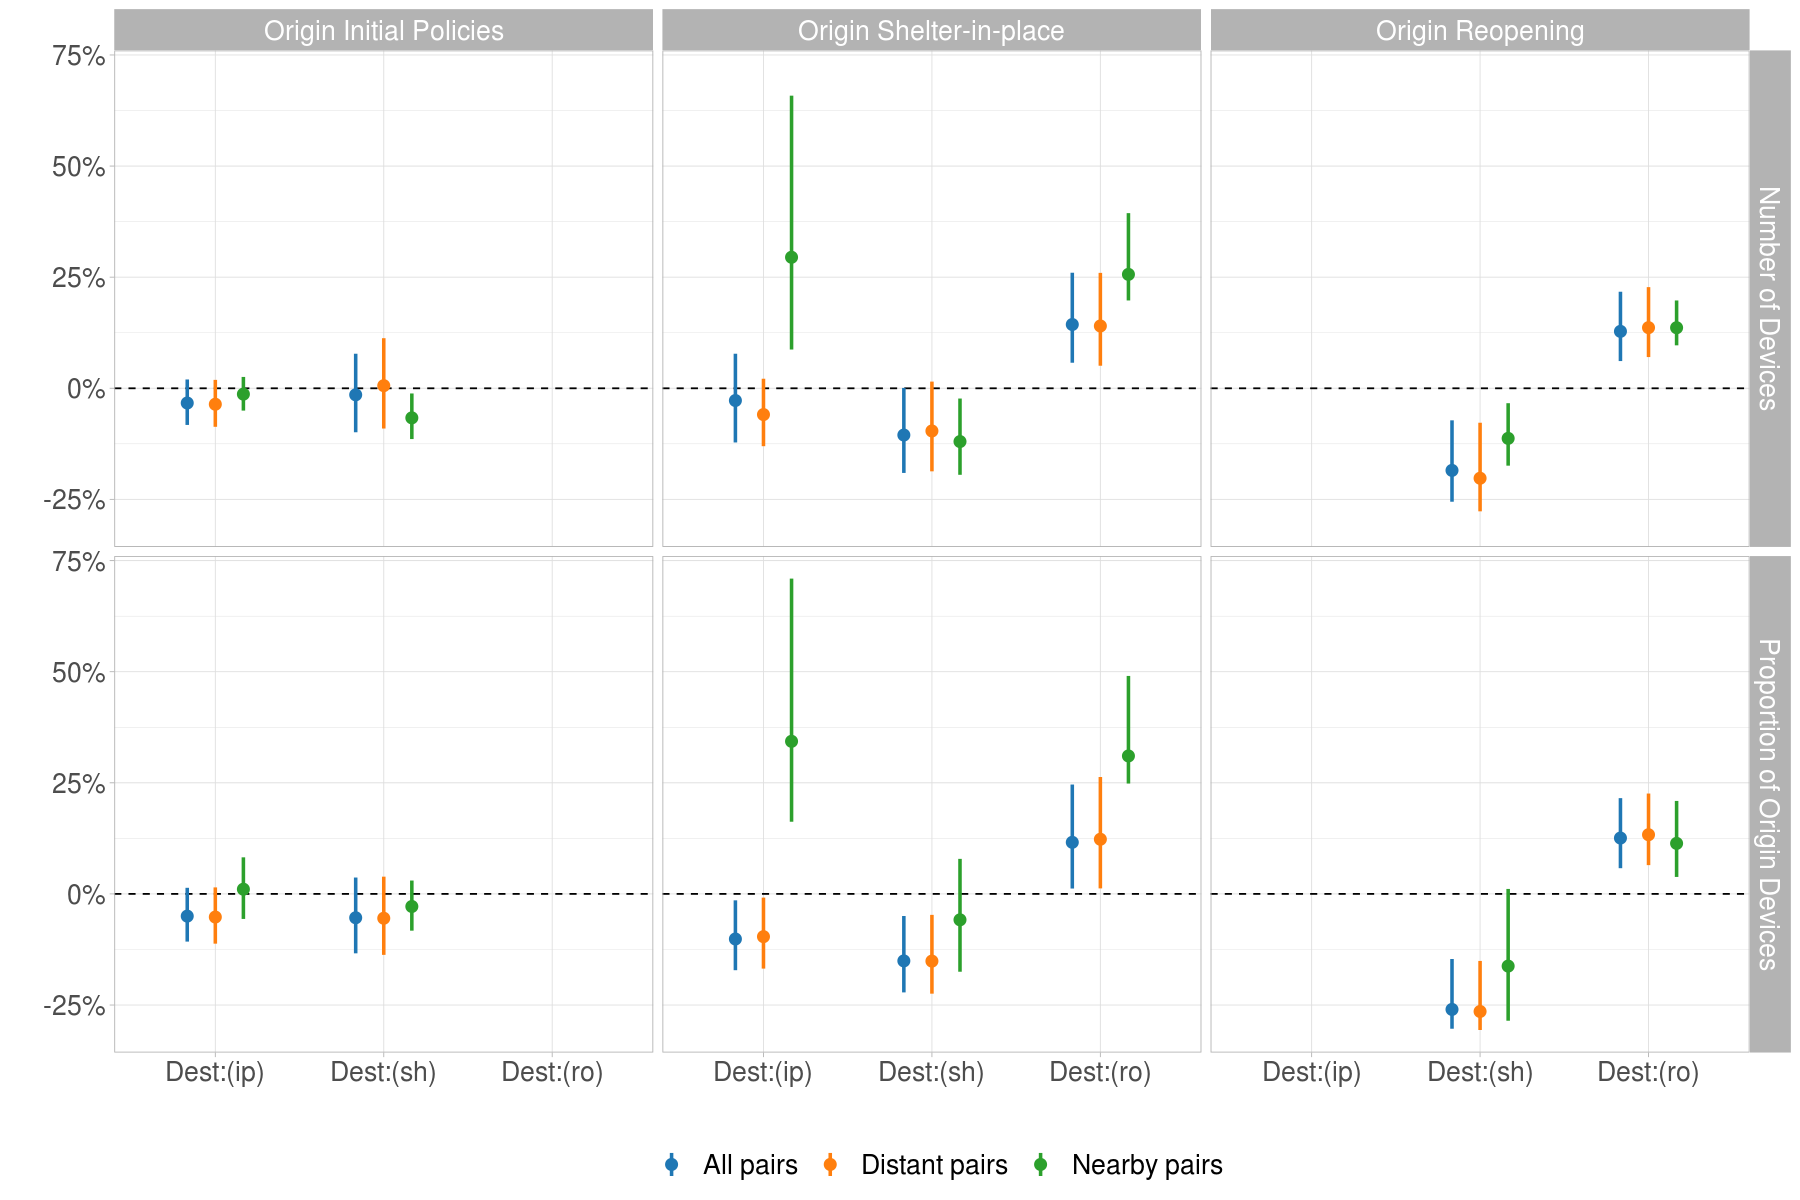

In [72]:
pn <- c('op1'   = "Origin Initial Policies",
        'op2'   = "Origin Shelter-in-place",
        'op3'   = "Origin Reopening",
        'ndotd' = 'Number of Devices',
        'pdotd' = 'Proportion of Origin Devices')

dyad_coefs2 %>%
    separate(var, into = c('origin policy', 'destination policy')) %>%
    left_join(ics) %>%
    filter(!is.na(`destination policy`), `origin policy` != 'op0', `destination policy` != 'dp0') %>%
    mutate(`destination policy` = ifelse(str_detect(`destination policy`, 'p1'), 'D:(ip)', 
                                        ifelse(str_detect(`destination policy`, 'p2'), 'D:(sh)', 'D:(ro)')),
           `destination policy` = factor(`destination policy`, levels = c('D:(ip)', 'D:(sh)', 'D:(ro)'))) -> temp

temp %>%
    mutate(estimate = exp(estimate) - 1,
           u95ci   = exp(estimate + 1.98 * se) - 1,
           l95ci    = exp(estimate - 1.98 * se) - 1) %>%
    filter(n > 4000) %>%
    ggplot(aes(x = `destination policy`, y = estimate, color = type)) + 
    geom_hline(aes(yintercept = 0), linetype = 2) +
    geom_point(position = position_dodge(0.5), size = 3) +
    geom_linerange(aes(ymin = l95ci, ymax = u95ci), 
                   position = position_dodge(0.5), size = 1) +
    scale_color_d3() +
    xlab('') + 
    ylab('') +
    labs(color = '') + 
    scale_color_d3(labels = c('All pairs', 'Distant pairs', 'Nearby pairs')) + 
    scale_y_continuous(labels = scales::percent) +
    scale_x_discrete(labels = c('Dest:(ip)',
                                'Dest:(sh)',
                                'Dest:(ro)')) + 
    facet_grid(dv ~ `origin policy`, labeller = as_labeller(pn)) +
    theme_light() +
    theme(text = element_text(size=20),
          legend.position = 'bottom') -> p

ggsave('/home/mfzhao/p4.pdf', p, device = 'pdf', width = 6.5, height = 5, scale = 2)

p

In [54]:
sum(ics$n)

[1] 6214936

In [56]:
4000/(6214936/2)

[1] 0.001287222

In [ ]:
as.data.frame(summary(fit7)$coef) %>%
    mutate(var = rownames(.)) %>%
    filter(!is.na(Estimate)) %>%
    mutate(var = ifelse(var == 'op3_dp0', 'op3_dp1', var),
           dv  = 'ndotd') %>%
    bind_rows(as.data.frame(summary(fit8)$coef) %>%
              mutate(var = rownames(.)) %>%
              filter(!is.na(Estimate)) %>%
              mutate(var = ifelse(var == 'op3_dp0', 'op3_dp1', var),
                     dv  = 'pdotd')) %>%
    filter(!str_detect(var, 'Rain'), !str_detect(var, 'TMAX')) %>%
    separate(var, into = c('origin policy', 'destination policy')) %>%
    rename(estimate = Estimate, se = `Cluster s.e.`) %>%
    filter(!is.na(`destination policy`), `origin policy` != 'op0') %>%
    ggplot(aes(x = `destination policy`, y = estimate)) + 
    geom_hline(aes(yintercept = 0), linetype = 2) +
    geom_point(position = position_dodge(0.5), size = 3) +
    geom_linerange(aes(ymin = estimate - 1.98 * se, ymax = estimate + 1.98 * se), 
                   position = position_dodge(0.5), size = 1) +
    xlab('') + 
    ylab('') +
    facet_grid(dv ~ `origin policy`) +
    theme_light() +
    theme(text = element_text(size=20),
          legend.position = 'bottom')

In [243]:
temp %>%
    mutate(impact = (exp(estimate) - 1) * 100) %>%
    filter(`origin policy`      == 'op3', 
           `destination policy` == 'D:(ro)')

estimate,se,t value,Pr(>|t|),origin policy,destination policy,dv,type,n,impact
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<chr>,<chr>,<int>,<dbl>
-0.00577751,0.03550385,-0.1627291,8.713876e-01,op3,D:(ro),ndotd,nearby,175627,-0.5760853
0.17317551,0.03700393,4.6799222,2.222326e-05,op3,D:(ro),ndotd,distant,617121,18.9074782
-0.01065029,0.03839293,-0.2774024,7.826149e-01,op3,D:(ro),pdotd,nearby,175627,-1.0593778
0.13117037,0.03639618,3.6039594,7.211945e-04,op3,D:(ro),pdotd,distant,617121,14.0162014
0.12047251,0.03463586,3.4782596,1.054736e-03,op3,D:(ro),ndotd,all,792748,12.8029725
0.11841760,0.03508354,3.3753036,1.432862e-03,op3,D:(ro),pdotd,all,792748,12.5714113


In [ ]:
fit1 <- felm(log(pdotd) ~ oRain1 + oRain2 + poly(oTMAX, 2) + poly(dTMAX, 2) +
             op1 + op2 + op3 + dp1 + dp2 + dp3 + 
             op1:dp1 + op1:dp2 + op1:dp3 + 
             op2:dp1 + op2:dp2 + op2:dp3 + 
             op3:dp1 + op3:dp2 + op3:dp3
             | dyad + date | 0 | origin_cluster + destination_cluster, df, weights = df$n)
summary(fit1)

In [ ]:
fit1 <- felm(log(ndotd) ~ oRain + dRain + poly(oTMAX, 2) + poly(dTMAX, 2) +
             op2 + op3 + dp2 + dp3 +
             op2:dp2 + op2:dp3 + 
             op3:dp2 + op3:dp3
             | dyad + date | 0 | origin_cluster + destination_cluster, df)
summary(fit1)

In [ ]:
fit1 <- felm(log(pdotd) ~ oRain + dRain + poly(oTMAX, 2) + poly(dTMAX, 2) +
             op2 + op3 + dp2 + dp3 +
             op2:dp2 + op2:dp3 + 
             op3:dp2 + op3:dp3
             | dyad + date | 0 | origin_cluster + destination_cluster, df, weights = df$n)
summary(fit1)

In [47]:
df %>%
    mutate(origin = str_sub(dyad, 1, 5)) %>%
    select(origin, n) %>%
    distinct() %>%
    arrange(n) %>%
    summarize(sum(n))

sum(n)
<int>
298896648
